# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv("../data/Wholesale customers data.csv")
customers.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# What does each column mean?
customers.describe()

"""
From data set description:
1) FRESH: annual spending (m.u.) on fresh products (Continuous)
2) MILK: annual spending (m.u.) on milk products (Continuous)
3) GROCERY: annual spending (m.u.)on grocery products (Continuous)
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
7) CHANNEL: Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8) REGION: Lisnon, Oporto or Other (Nominal)
"""

'\nFrom data set description:\n1) FRESH: annual spending (m.u.) on fresh products (Continuous)\n2) MILK: annual spending (m.u.) on milk products (Continuous)\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous)\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)\n7) CHANNEL: Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)\n8) REGION: Lisnon, Oporto or Other (Nominal)\n'

In [4]:
# Any categorical data to convert?
customers.dtypes

"""
No all categorical data is already converted into numbers
"""

'\nNo all categorical data is already converted into numbers\n'

In [5]:
# Any missing data to remove?
customers.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

'\nIt seems that Detergents_Paper and Grocery are quite highly correlated (0.92)\n'

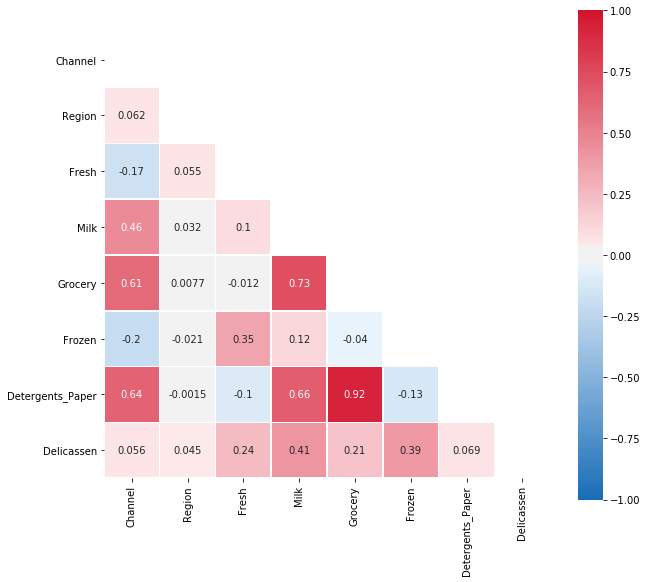

In [6]:
# Column collinearity - any high correlations?

# Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation heatmap
corr = customers.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(250, 10, s=95, l=45,n=9, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,square=True, linewidths=.5, 
                cbar_kws={"shrink": .9}, annot=True)



"""
It seems that Detergents_Paper and Grocery are quite highly correlated (0.92)
"""

In [7]:
# Descriptive statistics - any outliers to remove?
stats = customers.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']

outliers = pd.DataFrame(columns=customers.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = customers[(customers[col] < lower) | 
                   (customers[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
results

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Outlier
2,2,3,6353,8808,7684,2405,3516,7844,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465,Delicassen
71,1,3,18291,1266,21042,5373,4173,14472,Delicassen
87,1,3,43265,5025,8117,6312,1579,14351,Delicassen
171,2,3,200,25862,19816,651,8773,6250,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550,Delicassen
183,1,3,36847,43950,20170,36534,239,47943,Delicassen
202,1,1,25203,11487,9490,5065,284,6854,Delicassen
218,2,1,18,7504,15205,1285,4797,6372,Delicassen


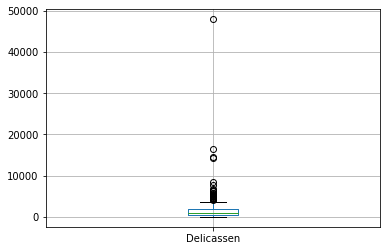

In [8]:
customers.boxplot("Delicassen")

In [9]:
print("There seem to be",len(results),"outliers. But one observation is particularly high as you can see in the boxplot")

There seem to be 10 outliers. But one observation is particularly high as you can see in the boxplot


[ 0.75835455 -1.27924678  2.55258269  4.03992212  3.57518722  5.88782573
  3.61945758 11.11353365]
significantly skewed
significantly skewed
significantly skewed
significantly skewed
significantly skewed
significantly skewed
significantly skewed
significantly skewed


'\nSome variables are just 1 or 2 because they are categorical variables\nthat have been encoded. But for the continous values it seems that \nall distributions are significantly skewed to the left.\n'

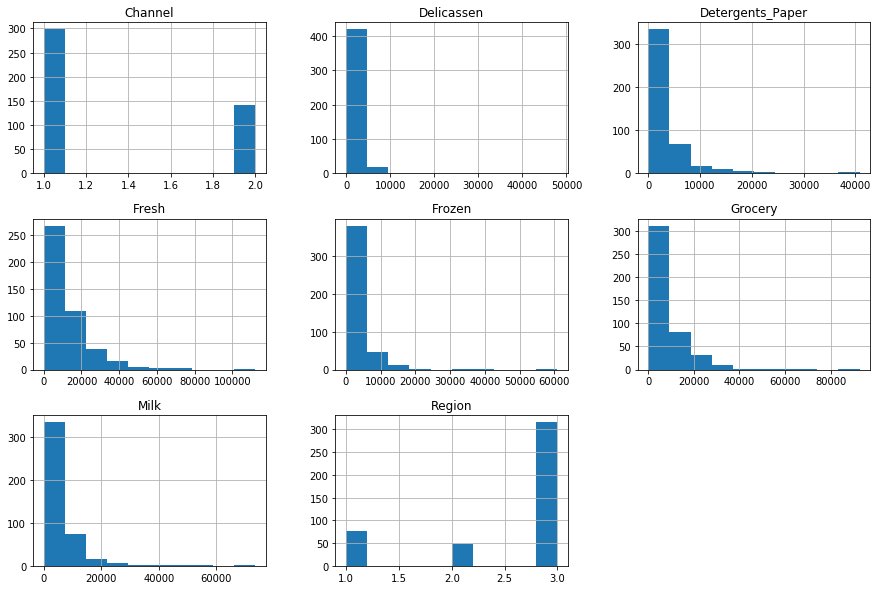

In [10]:
# Column-wise data distribution - is the distribution skewed?

# Import library
from scipy.stats import skew
from scipy.stats import skewtest

# Create histograms
customers.hist(figsize=(15,10))

# Calculate skew
print(skew(customers))

# Check if significantly skewed
stat, pvalue = skewtest(customers)

for p in pvalue:
    if p < .05:
        print("significantly skewed")
    elif p >= 0.05:
        print("not significantly skewed")
    else:
        print("something went wrong")

"""
Some variables are just 1 or 2 because they are categorical variables
that have been encoded. But for the continous values it seems that 
all distributions are significantly skewed to the left.
"""

In [11]:
# Check Pareto principle
cummulative_sum = customers.cumsum()
cummulative_perc = 100 * cummulative_sum / customers.sum()
cummulative_perc

# cummulative_perc.hist(figsize=(15,10))
pareto = cummulative_perc[(cummulative_perc["Fresh"])< 20] 
pareto
# Source: https://mode.com/blog/pareto-chart-101/

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.343643,0.268097,0.239937,0.378614,0.216117,0.015833,0.210907,0.199421
1,0.687285,0.536193,0.373589,0.763266,0.489601,0.146192,0.470637,0.464123
2,1.030928,0.804290,0.493908,1.108629,0.709234,0.324122,0.747955,1.633224
3,1.202749,1.072386,0.745133,1.155525,0.829884,0.797914,0.787944,1.899714
4,1.546392,1.340483,1.173437,1.367652,1.035625,1.087560,0.928102,2.672507
...,...,...,...,...,...,...,...,...
72,19.587629,19.571046,18.856407,23.187538,23.185583,12.691155,25.279980,23.447893
73,19.931271,19.839142,19.233273,23.396607,23.434628,13.292790,25.340239,23.544474
74,20.274914,20.107239,19.388383,23.645317,23.714572,13.387859,25.490178,23.809772
75,20.446735,20.375335,19.774699,23.689899,23.714658,13.713905,25.490414,23.955090


In [12]:
# sales_80
customers_20 = round(len(customers)*.2)+1
cummulative_perc[:customers_20]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.343643,0.268097,0.239937,0.378614,0.216117,0.015833,0.210907,0.199421
1,0.687285,0.536193,0.373589,0.763266,0.489601,0.146192,0.470637,0.464123
2,1.030928,0.804290,0.493908,1.108629,0.709234,0.324122,0.747955,1.633224
3,1.202749,1.072386,0.745133,1.155525,0.829884,0.797914,0.787944,1.899714
4,1.546392,1.340483,1.173437,1.367652,1.035625,1.087560,0.928102,2.672507
...,...,...,...,...,...,...,...,...
84,22.680412,22.788204,21.207523,25.462553,25.881605,14.920653,27.889581,25.094084
85,23.024055,23.056300,21.512762,27.273946,28.533552,14.996560,31.109739,25.532869
86,23.367698,23.324397,21.946937,30.155817,29.451472,15.069582,32.692725,25.667456
87,23.539519,23.592493,22.766329,30.352849,29.683481,15.536566,32.817266,27.806386


Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the Pareto principle. Check if this dataset displays this characteristic.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
# Your code here

In [14]:
"""
It could be that the outliers could be dropped, but since I have no
clear industry-related reasons to do so, I choose to keep the data.

Since grocery and paper sales are related but in very different categories
I also decide to keep it.
"""

'\nIt could be that the outliers could be dropped, but since I have no\nclear industry-related reasons to do so, I choose to keep the data.\n\nSince grocery and paper sales are related but in very different categories\nI also decide to keep it.\n'

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler = scaler.fit(customers)
customers_scale = scaler.fit_transform(customers)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
# Import library
from sklearn.cluster import KMeans
from sklearn import cluster

# Initate K-Means model
kmeans = cluster.KMeans()

# Fit scaled data
kmeans.fit(customers_scale)

# Assign labels to records
customers["labels"] = kmeans.labels_


Count the values in `labels`.

In [17]:
# Your code here:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([176,  36,  94,  39,   6,  86,   1,   2]))

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [18]:
# Import library
from sklearn.cluster import DBSCAN

# Cluster using DBSCAN - initiate and fit data
clustering = DBSCAN(eps=0.5).fit(customers_scale)

customers["labels_DBSCAN"] = clustering.labels_

customers.head(50)
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
5,2,3,9413,8259,5126,666,1795,1451,2,-1
6,2,3,12126,3199,6975,480,3140,545,2,0
7,2,3,7579,4956,9426,1669,3321,2566,2,-1
8,1,3,5963,3648,6192,425,1716,750,0,1
9,2,3,6006,11093,18881,1159,7425,2098,2,-1


Count the values in `labels_DBSCAN`.

In [19]:
# Your code here
np.unique(clustering.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([255,   5, 130,   5,   5,   7,  22,   6,   5]))

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

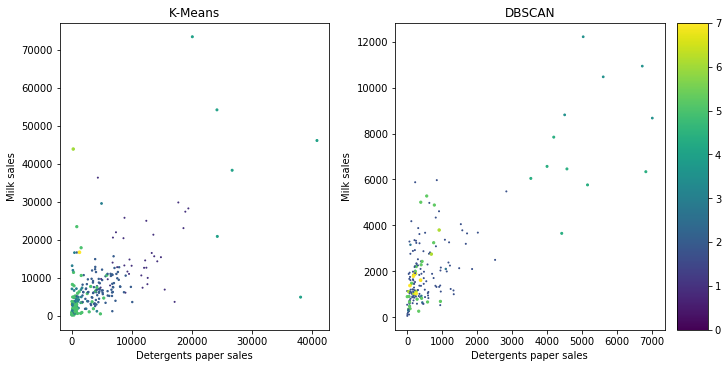

In [94]:
# Initialize variables
x = customers["Detergents_Paper"]
y = customers["Milk"]
c = customers["labels"]
label = customers["labels"]
labels_DBSCAN = customers["labels_DBSCAN"]

# Create plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)
axes[0].scatter(x, y, label, label)
axes[1].scatter(x, y, labels_DBSCAN, labels_DBSCAN)

axes[0].set_title("K-Means")
axes[1].set_title("DBSCAN")

plt.colorbar(plot)

for ax in axes:
    ax.set_xlabel("Detergents paper sales")
    ax.set_ylabel("Milk sales")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

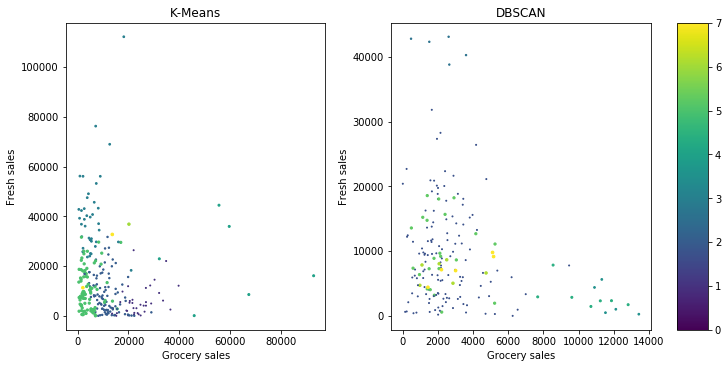

In [95]:
# Initialize variables
x = customers["Grocery"]
y = customers["Fresh"]
c = customers["labels"]

# Create plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)
axes[0].scatter(x, y, label, label)
axes[1].scatter(x, y, labels_DBSCAN, labels_DBSCAN)

axes[0].set_title("K-Means")
axes[1].set_title("DBSCAN")

plt.colorbar(plot)

for ax in axes:
    ax.set_xlabel("Grocery sales")
    ax.set_ylabel("Fresh sales")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

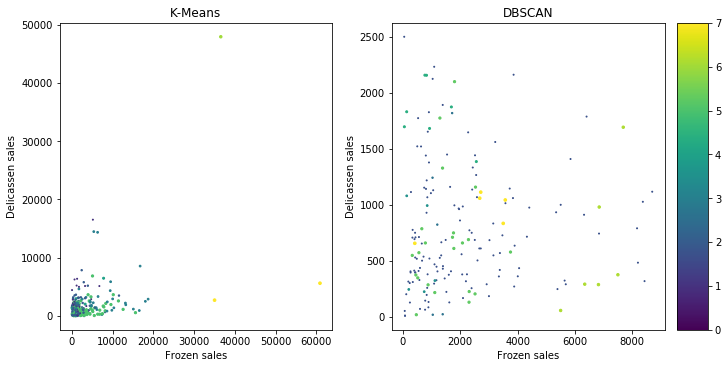

In [97]:
# Initialize variables
x = customers["Frozen"]
y = customers["Delicassen"]
c = customers["labels"]
label = customers["labels"]

# Create plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)
axes[0].scatter(x, y, label, label)
axes[1].scatter(x, y, labels_DBSCAN, labels_DBSCAN)

axes[0].set_title("K-Means")
axes[1].set_title("DBSCAN")

plt.colorbar(plot)

for ax in axes:
    ax.set_xlabel("Frozen sales")
    ax.set_ylabel("Delicassen sales")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [98]:
# Group customers by labels and labels_DBSACN
customers.groupby(["labels","labels_DBSCAN"]).agg("mean")

Channel    Region         Fresh          Milk  \
labels labels_DBSCAN                                                   
0      -1             1.000000  3.000000   8855.063830   5890.957447   
        1             1.000000  3.000000   8952.984496   1865.767442   
1      -1             2.000000  2.138889   5850.361111  15629.555556   
2      -1             2.000000  2.805195   9322.701299   7562.428571   
        0             2.000000  3.000000  11401.000000   3536.200000   
        3             2.000000  3.000000   2357.200000  10224.800000   
        4             2.000000  3.000000   3068.142857   6095.857143   
3      -1             1.060606  2.757576  40537.727273   5750.696970   
        1             1.000000  3.000000  31812.000000   1433.000000   
        2             1.000000  3.000000  41446.600000   1421.200000   
4      -1             2.000000  2.833333  21350.000000  39710.333333   
5      -1             1.075472  1.415094  11503.150943   4114.452830   
        5             1.000000  1.000000   9837.863636   1751.863636   
        6             1.000000  1.000000   6823.000000   1943.000000   
        7             1.000000  2.000000   7494.600000   1537.600000   
6      -1             1.000000  3.000000  36847.000000  43950.000000   
7      -1             1.000000  2.500000  22015.500000   9937.000000   

                           Grocery        Frozen  Detergents_Paper  \
labels labels_DBSCAN                                                 
0      -1              6138.085106   4186.042553       1524.574468   
        1              2429.519380   2141.751938        499.550388   
1      -1             23907.138889   1754.361111      11192.805556   
2      -1             11708.350649   1612.428571       4715.012987   
        0              6729.000000    720.200000       3561.000000   
        3             11862.800000    609.600000       5780.000000   
        4             10355.000000    994.000000       4675.571429   
3      -1              6437.848485   7731.363636       1023.848485   
        1              1651.000000    800.000000        113.000000   
        2              2167.600000   1276.400000        416.200000   
4      -1             58864.833333   2202.666667      29017.000000   
5      -1              5213.716981   3451.037736       1204.924528   
        5              2161.681818   1513.181818        333.954545   
        6              2372.666667   6780.333333        386.500000   
        7              3383.000000   2575.400000        227.400000   
6      -1             20170.000000  36534.000000        239.000000   
7      -1              7844.000000  47939.000000        671.500000   

                        Delicassen  
labels labels_DBSCAN                
0      -1              1732.723404  
        1               736.534884  
1      -1              2491.972222  
2      -1              1541.389610  
        0               258.200000  
        3               572.800000  
        4              1826.428571  
3      -1              3051.000000  
        1              1440.000000  
        2               784.800000  
4      -1              2494.500000  
5      -1              1297.811321  
        5               669.045455  
        6               613.666667  
        7               941.000000  
6      -1             47943.000000  
7      -1              4153.500000

Which algorithm appears to perform better?

In [24]:
"""
"""

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [109]:
# Initate K-Means model
kmeans = cluster.KMeans(n_clusters=5)

# Fit scaled data
kmeans.fit(customers_scale)

# Assign labels to records
customers["labels"] = kmeans.labels_

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


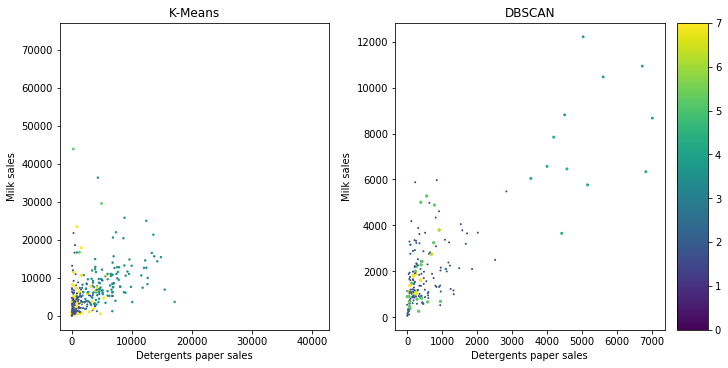

In [110]:
# Initialize variables
x = customers["Detergents_Paper"]
y = customers["Milk"]
c = customers["labels"]
label = customers["labels"]
labels_DBSCAN = customers["labels_DBSCAN"]

# Create plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)
axes[0].scatter(x, y, label, label)
axes[1].scatter(x, y, labels_DBSCAN, labels_DBSCAN)

axes[0].set_title("K-Means")
axes[1].set_title("DBSCAN")

plt.colorbar(plot)

for ax in axes:
    ax.set_xlabel("Detergents paper sales")
    ax.set_ylabel("Milk sales")

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [27]:
# Your code here

In [28]:
# Your comment here